In [1]:
from deepface import DeepFace
import json
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import statistics
import pandas as pd

In [2]:
# Abrir el archivo de video
cap = cv2.VideoCapture("./resources/video/Chorizo ternera Lucas Hernández I.mp4")

In [3]:
# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el video.")
    exit()
else:
    # Obtener el número total de frames
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    
    # Obtener la tasa de frames por segundo (FPS)
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Calcular la duración del video en segundos
    duration = total_frames / fps
    
    # Convertir la duración a minutos y segundos
    minutes = int(duration // 60)
    seconds = int(duration % 60)
    
    print(f"Duración del video: {minutes} minutos y {seconds} segundos")

# Liberar el objeto VideoCapture
cap.release()

Duración del video: 0 minutos y 59 segundos


### Análisis Videos

### Video 1

In [4]:
# Abrir el archivo de video
cap = cv2.VideoCapture("./resources/video/Chorizo ternera Lucas Hernández I.mp4")
# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el video.")
    exit()
else:
    # Obtener la tasa de frames por segundo (FPS)
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Calcular el intervalo de tiempo entre frames
    frame_interval = 1 / fps

    # Inicializar el contador de tiempo
    time_counter = 0
    
    # Inicializar el contador de frames
    frame_counter = 0
    
    d = {}

    # Leer y mostrar cada fotograma del video
    while True:
        ret, frame = cap.read()

        if not ret:
            break

         # Calcular el tiempo actual en segundos
        current_time = frame_counter * frame_interval

        # Verificar si ha pasado un segundo
        if current_time >= time_counter:
            # Imprimir el tiempo actual en segundos
            #print(f"Segundo: {int(time_counter)}")
            d[time_counter] = DeepFace.analyze(frame)[0]
            # Aumentar el contador de tiempo en un segundo
            time_counter += 1
        
        # Aumentar el contador de frames
        frame_counter += 1
    
    # Liberar el objeto VideoCapture
    cap.release()

print("Procesamiento del video completo.")

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]   

Procesamiento del video completo.


In [5]:
video_summary = {}
for i in d:
    j = {}
    j['dominant_emotion'] = d[i]['dominant_emotion']
    j['emotion_percent'] = d[i]['emotion'][d[i]['dominant_emotion']]
    j['dominant_race'] = d[i]['dominant_race']
    j['age'] = d[i]['age']
    j['dominant_gender'] = d[i]['dominant_gender']
    j['region'] = d[i]['region']
    video_summary[i] = j
video_summary

{0: {'dominant_emotion': 'neutral',
  'emotion_percent': 78.6862850189209,
  'dominant_race': 'white',
  'age': 34,
  'dominant_gender': 'Man',
  'region': {'x': 484, 'y': 111, 'w': 302, 'h': 302}},
 1: {'dominant_emotion': 'neutral',
  'emotion_percent': 80.99962699417746,
  'dominant_race': 'white',
  'age': 31,
  'dominant_gender': 'Man',
  'region': {'x': 488, 'y': 112, 'w': 295, 'h': 295}},
 2: {'dominant_emotion': 'neutral',
  'emotion_percent': 90.81651677888432,
  'dominant_race': 'white',
  'age': 33,
  'dominant_gender': 'Man',
  'region': {'x': 488, 'y': 111, 'w': 306, 'h': 306}},
 3: {'dominant_emotion': 'neutral',
  'emotion_percent': 79.63877563014321,
  'dominant_race': 'white',
  'age': 34,
  'dominant_gender': 'Man',
  'region': {'x': 490, 'y': 103, 'w': 318, 'h': 318}},
 4: {'dominant_emotion': 'neutral',
  'emotion_percent': 98.03240895271301,
  'dominant_race': 'white',
  'age': 34,
  'dominant_gender': 'Man',
  'region': {'x': 495, 'y': 110, 'w': 306, 'h': 306}},
 

In [6]:
# Recorrer la lista de diccionarios
emotion = []
age = []
segs = []
region = []
for key, value in video_summary.items():
    emotion.append(value['dominant_emotion'])
    age.append(value['age'])
    segs.append(key)
    region.append(value['region'])

In [7]:
df = pd.DataFrame()
df['segundo'] = segs
df['age'] = age
df['emotion'] = emotion
df['region'] = region
df.head(10)

segundo  age  emotion                                    region
0        0   34  neutral  {'x': 484, 'y': 111, 'w': 302, 'h': 302}
1        1   31  neutral  {'x': 488, 'y': 112, 'w': 295, 'h': 295}
2        2   33  neutral  {'x': 488, 'y': 111, 'w': 306, 'h': 306}
3        3   34  neutral  {'x': 490, 'y': 103, 'w': 318, 'h': 318}
4        4   34  neutral  {'x': 495, 'y': 110, 'w': 306, 'h': 306}
5        5   26  neutral  {'x': 496, 'y': 133, 'w': 276, 'h': 276}
6        6   30      sad  {'x': 462, 'y': 134, 'w': 280, 'h': 280}
7        7   31    angry  {'x': 506, 'y': 103, 'w': 293, 'h': 293}
8        8   37     fear  {'x': 552, 'y': 128, 'w': 272, 'h': 272}
9        9   27     fear    {'x': 660, 'y': 512, 'w': 52, 'h': 52}

In [8]:
df['emotion'].value_counts()

emotion
sad        24
neutral    20
fear       11
angry       4
happy       1
Name: count, dtype: int64

<Axes: xlabel='emotion'>

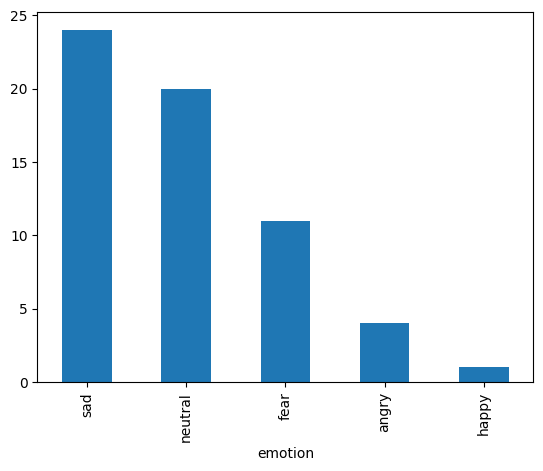

In [9]:
df['emotion'].value_counts().plot(kind='bar')

In [10]:
# Asignar un valor numérico a cada emoción para graficar
emotion_mapping = {'neutral': 5, 'sad': 3, 'angry': 1, 'fear': 4, 'disgust': 2, 'surprise':6, 'happy': 7 }
df['emotion_num'] = df['emotion'].map(emotion_mapping)

### Momentos de ingestion de alimentos
Comer: 7, 23, 39

Tragar: 9, 26, 43

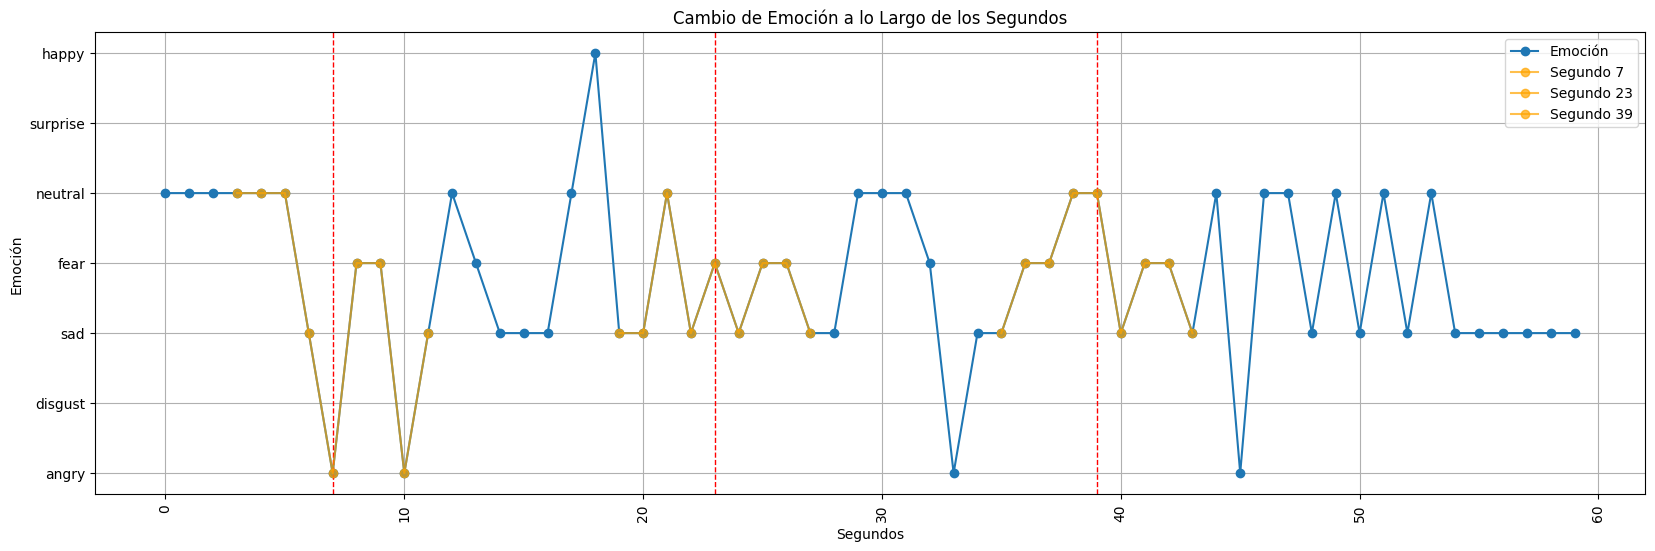

Moda: sad


In [11]:
# Crear la gráfica
plt.figure(figsize=(20, 6))

# Obtener los datos
segundos = df['segundo']
emocion_num = df['emotion_num']

# Tramar la línea principal
plt.plot(segundos, emocion_num, marker='o', linestyle='-', label='Emoción')

# Identificar los segundos específicos de interés
segundos_especificos = [7, 23, 39]  # Ejemplo, reemplaza con tus valores específicos

# Pintar de manera diferente la línea 350 milisegundos antes y después de cada segundo específico
for segundo in segundos_especificos:
    indice_segundo = segundos.index[segundo]
    plt.axvline(segundo, color='red', linestyle='--', linewidth=1)  # Obtener el índice del segundo específico
    
    # Definir los rangos de índices para 350 milisegundos antes y después
    inicio = max(0, indice_segundo - 4)  # Aprox. 350 ms antes (7 datos atrasados)
    fin = min(len(segundos) - 1, indice_segundo + 4)  # Aprox. 350 ms después (7 datos adelantados)
    
    color_segmento = 'orange'  # Cambia el color aquí si lo deseas

    # Tramar la línea con color diferente para los segmentos específicos
    plt.plot(segundos[inicio:fin+1], emocion_num[inicio:fin+1], marker='o', linestyle='-', label=f'Segundo {segundo}', alpha=0.7, color=color_segmento)

# Ajustar los ticks y etiquetas del gráfico
plt.xticks(rotation=90)  # Rotar los ticks del eje x
plt.yticks(list(emotion_mapping.values()), list(emotion_mapping.keys()))
plt.xlabel('Segundos')
plt.ylabel('Emoción')
plt.title('Cambio de Emoción a lo Largo de los Segundos')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar la moda de las emociones
print('Moda:', df['emotion'].mode()[0])

In [12]:
def get_frame_from_second(video_path, second):
    # Abrir el video
    cap = cv2.VideoCapture(video_path)
    
    # Obtener el número de frames por segundo (fps) del video
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Calcular el número de frames para el segundo deseado
    frame_number = int(second * fps)
    
    # Mover el puntero del video al frame deseado
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    # Leer el frame
    ret, frame = cap.read()
    
    # Cerrar el video
    cap.release()
    
    if ret:
        # Convertir el frame de BGR a RGB para mostrar correctamente con matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Mostrar la imagen usando matplotlib
        plt.imshow(frame_rgb)
        plt.title(f'Imagen del segundo {second}')
        plt.axis('off')  # Ocultar los ejes
        plt.show()
    else:
        print(f"Couldn't retrieve frame at {second} seconds")

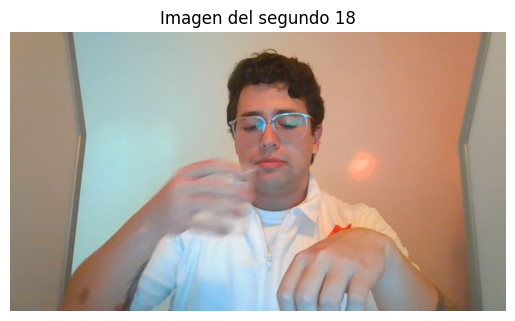

In [13]:
second = 18
video_path = "./resources/video/Chorizo ternera Lucas Hernández I.mp4"
# Llamar a la función
get_frame_from_second(video_path, second)

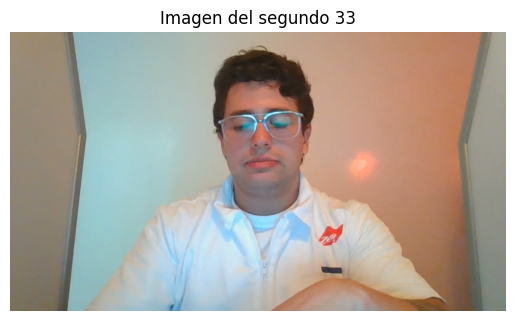

In [14]:
get_frame_from_second(video_path, second=33) # disgusto

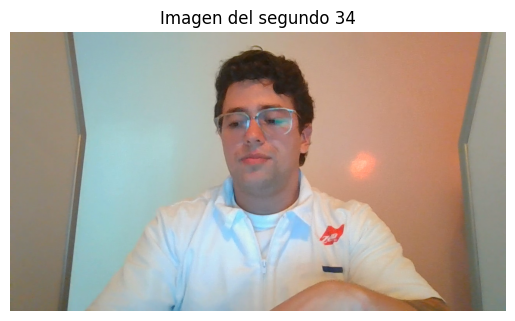

In [15]:
get_frame_from_second(video_path, second=34)

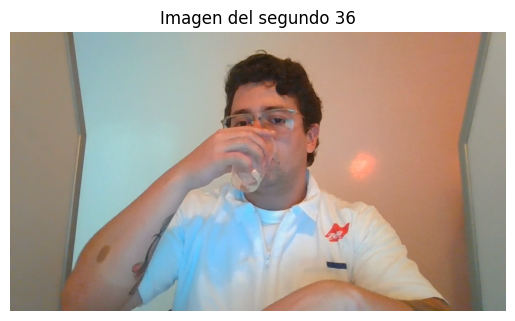

In [16]:
get_frame_from_second(video_path, second=36)

### Video 2

In [17]:
# Abrir el archivo de video
cap = cv2.VideoCapture("./resources/video/Chorizo ternera Paula Ortiz II.mp4")
# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el video.")
    exit()
else:
    # Obtener la tasa de frames por segundo (FPS)
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Calcular el intervalo de tiempo entre frames
    frame_interval = 1 / fps

    # Inicializar el contador de tiempo
    time_counter = 0
    
    # Inicializar el contador de frames
    frame_counter = 0
    
    d = {}

    # Leer y mostrar cada fotograma del video
    while True:
        ret, frame = cap.read()

        if not ret:
            break

         # Calcular el tiempo actual en segundos
        current_time = frame_counter * frame_interval

        # Verificar si ha pasado un segundo
        if current_time >= time_counter:
            # Imprimir el tiempo actual en segundos
            #print(f"Segundo: {int(time_counter)}")
            try:
                d[time_counter] = DeepFace.analyze(frame)[0]
                
            except:
                print('Error segundo: ', time_counter )
            
            time_counter += 1
           
        
        # Aumentar el contador de frames
        frame_counter += 1
    
    # Liberar el objeto VideoCapture
    cap.release()

print("Procesamiento del video completo.")

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]   


Error segundo:  9


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]   


Error segundo:  47
Error segundo:  48
Error segundo:  49


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]   


Error segundo:  56
Error segundo:  57


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]   


Error segundo:  82
Error segundo:  83


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]   


Error segundo:  96
Error segundo:  97


Action: race: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]   


Error segundo:  105
Error segundo:  106


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]   


Error segundo:  111
Error segundo:  112


Action: race: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]   


Error segundo:  137
Error segundo:  138


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]   


Error segundo:  143


Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]   

Procesamiento del video completo.


In [18]:
video_summary = {}
for i in d:
    j = {}
    j['dominant_emotion'] = d[i]['dominant_emotion']
    j['emotion_percent'] = d[i]['emotion'][d[i]['dominant_emotion']]
    j['dominant_race'] = d[i]['dominant_race']
    j['age'] = d[i]['age']
    j['dominant_gender'] = d[i]['dominant_gender']
    j['region'] = d[i]['region']
    video_summary[i] = j

In [19]:
# Recorrer la lista de diccionarios
emotion = []
age = []
segs = []
region = []
for key, value in video_summary.items():
    emotion.append(value['dominant_emotion'])
    age.append(value['age'])
    segs.append(key)
    region.append(value['region'])

In [20]:
df = pd.DataFrame()
df['segundo'] = segs
df['age'] = age
df['emotion'] = emotion
df['region'] = region
df.head(10)

segundo  age  emotion                                    region
0        0   36  neutral  {'x': 553, 'y': 180, 'w': 285, 'h': 285}
1        1   39     fear  {'x': 555, 'y': 180, 'w': 287, 'h': 287}
2        2   35     fear  {'x': 552, 'y': 178, 'w': 279, 'h': 279}
3        3   35  neutral  {'x': 551, 'y': 172, 'w': 286, 'h': 286}
4        4   28  neutral  {'x': 556, 'y': 173, 'w': 281, 'h': 281}
5        5   27     fear  {'x': 600, 'y': 200, 'w': 285, 'h': 285}
6        6   25    angry  {'x': 556, 'y': 188, 'w': 278, 'h': 278}
7        7   35      sad  {'x': 560, 'y': 152, 'w': 300, 'h': 300}
8        8   40  neutral  {'x': 566, 'y': 170, 'w': 273, 'h': 273}
9       10   37  neutral  {'x': 550, 'y': 185, 'w': 290, 'h': 290}

<Axes: xlabel='emotion'>

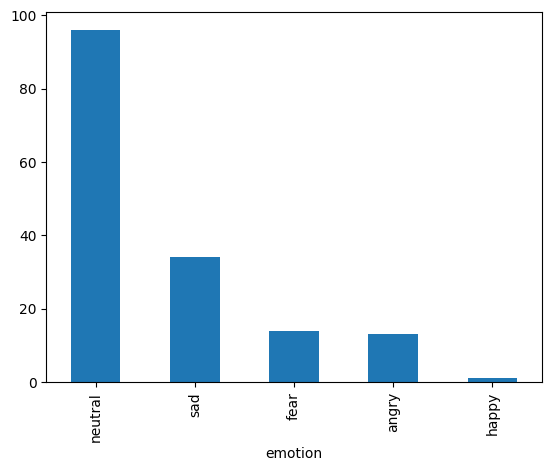

In [21]:
df['emotion'].value_counts().plot(kind='bar')

In [22]:
df['emotion_num'] = df['emotion'].map(emotion_mapping)
df.head(10)

segundo  age  emotion                                    region  \
0        0   36  neutral  {'x': 553, 'y': 180, 'w': 285, 'h': 285}   
1        1   39     fear  {'x': 555, 'y': 180, 'w': 287, 'h': 287}   
2        2   35     fear  {'x': 552, 'y': 178, 'w': 279, 'h': 279}   
3        3   35  neutral  {'x': 551, 'y': 172, 'w': 286, 'h': 286}   
4        4   28  neutral  {'x': 556, 'y': 173, 'w': 281, 'h': 281}   
5        5   27     fear  {'x': 600, 'y': 200, 'w': 285, 'h': 285}   
6        6   25    angry  {'x': 556, 'y': 188, 'w': 278, 'h': 278}   
7        7   35      sad  {'x': 560, 'y': 152, 'w': 300, 'h': 300}   
8        8   40  neutral  {'x': 566, 'y': 170, 'w': 273, 'h': 273}   
9       10   37  neutral  {'x': 550, 'y': 185, 'w': 290, 'h': 290}   

   emotion_num  
0            5  
1            4  
2            4  
3            5  
4            5  
5            4  
6            1  
7            3  
8            5  
9            5

### Momentos de ingestion de alimentos
Comer: 7, 61, 110, 142,

Tragar: 13, 67, 117, 148

In [23]:
df2 = df.copy()
df2.reset_index(inplace=True)

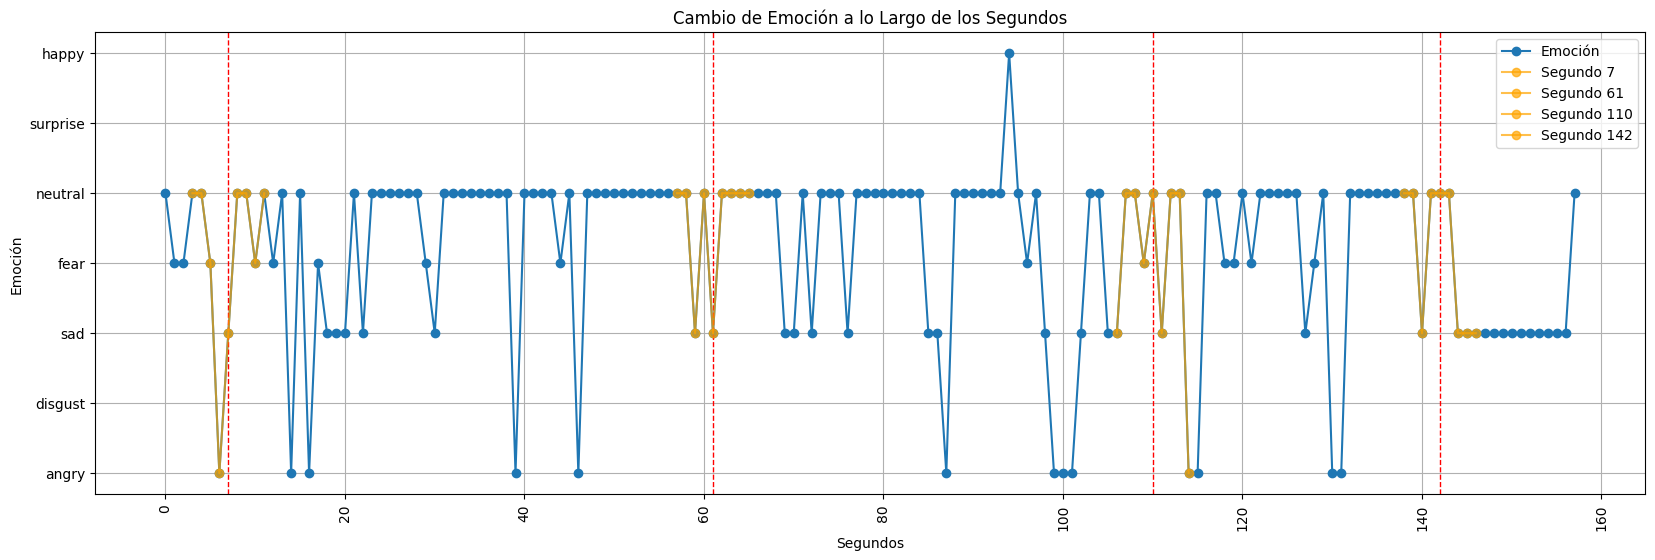

Moda: neutral


In [24]:
# Crear la gráfica
plt.figure(figsize=(20, 6))

# Obtener los datos
segundos = df2['index']
emocion_num = df2['emotion_num']

# Tramar la línea principal
plt.plot(segundos, emocion_num, marker='o', linestyle='-', label='Emoción')

# Identificar los segundos específicos de interés
segundos_especificos = [7, 61, 110, 142]  # Ejemplo, reemplaza con tus valores específicos

# Pintar de manera diferente la línea 350 milisegundos antes y después de cada segundo específico
for segundo in segundos_especificos:
    indice_segundo = segundos.index[segundo]
    plt.axvline(segundo, color='red', linestyle='--', linewidth=1)  # Obtener el índice del segundo específico
    
    # Definir los rangos de índices para 350 milisegundos antes y después
    inicio = max(0, indice_segundo - 4)  # Aprox. 350 ms antes (7 datos atrasados)
    fin = min(len(segundos) - 1, indice_segundo + 4)  # Aprox. 350 ms después (7 datos adelantados)
    
    color_segmento = 'orange'  # Cambia el color aquí si lo deseas

    # Tramar la línea con color diferente para los segmentos específicos
    plt.plot(segundos[inicio:fin+1], emocion_num[inicio:fin+1], marker='o', linestyle='-', label=f'Segundo {segundo}', alpha=0.7, color=color_segmento)

# Ajustar los ticks y etiquetas del gráfico
plt.xticks(rotation=90)  # Rotar los ticks del eje x
plt.yticks(list(emotion_mapping.values()), list(emotion_mapping.keys()))
plt.xlabel('Segundos')
plt.ylabel('Emoción')
plt.title('Cambio de Emoción a lo Largo de los Segundos')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar la moda de las emociones
print('Moda:', df2['emotion'].mode()[0])

In [25]:
df2[df2['emotion']=='happy']

index  segundo  age emotion                                    region  \
94     94      104   26   happy  {'x': 648, 'y': 346, 'w': 133, 'h': 133}   

    emotion_num  
94            7

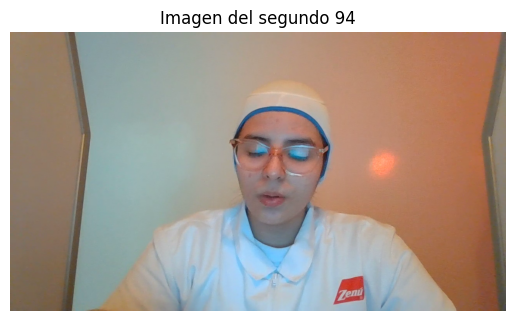

In [26]:
second = 94
video_path = "./resources/video/Chorizo ternera Paula Ortiz II.mp4"
# Llamar a la función
get_frame_from_second(video_path, second) # feliz

In [27]:
df2[(df2['emotion']=='angry') & (df2['segundo']==50)]

index  segundo  age emotion                                    region  \
46     46       50   28   angry  {'x': 589, 'y': 187, 'w': 272, 'h': 272}   

    emotion_num  
46            1

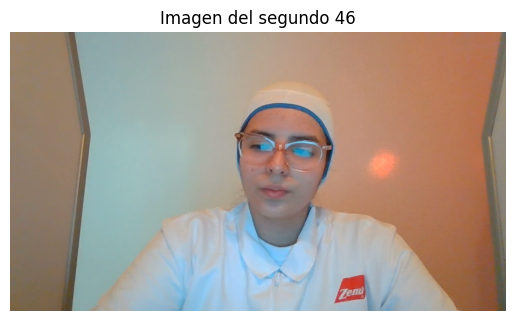

In [28]:
get_frame_from_second(video_path, second=46) # enojado

In [29]:
df2[(df2['emotion']=='sad') & (df2['segundo']==144)]

index  segundo  age emotion                                    region  \
127    127      144   30     sad  {'x': 583, 'y': 174, 'w': 289, 'h': 289}   

     emotion_num  
127            3

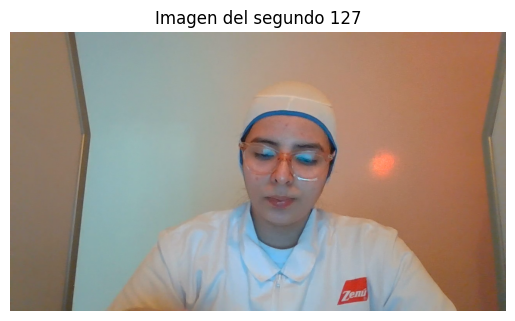

In [30]:
get_frame_from_second(video_path, second=127) # triste

In [31]:
df2[(df2['emotion']=='fear') & (df2['segundo']==145)]

index  segundo  age emotion                                    region  \
128    128      145   28    fear  {'x': 583, 'y': 191, 'w': 291, 'h': 291}   

     emotion_num  
128            4

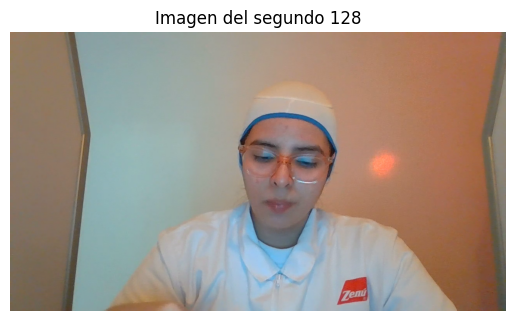

In [32]:
get_frame_from_second(video_path, second=128)# miedo

### Video 3

In [33]:
# Abrir el archivo de video
cap = cv2.VideoCapture("./resources/video/Chorizo ternera Dayron Montoya I.mp4")
# Verificar si el video se abrió correctamente
if not cap.isOpened():
    print("Error al abrir el video.")
    exit()
else:
    # Obtener la tasa de frames por segundo (FPS)
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Calcular el intervalo de tiempo entre frames
    frame_interval = 1 / fps

    # Inicializar el contador de tiempo
    time_counter = 0
    
    # Inicializar el contador de frames
    frame_counter = 0
    
    d = {}

    # Leer y mostrar cada fotograma del video
    while True:
        ret, frame = cap.read()

        if not ret:
            break

         # Calcular el tiempo actual en segundos
        current_time = frame_counter * frame_interval

        # Verificar si ha pasado un segundo
        if current_time >= time_counter:
            # Imprimir el tiempo actual en segundos
            #print(f"Segundo: {int(time_counter)}")
            try:
                d[time_counter] = DeepFace.analyze(frame)[0]
                
            except:
                print('Error segundo: ', time_counter )
            finally:
                # Aumentar el contador de tiempo en un segundo
                time_counter += 1
           
        
        # Aumentar el contador de frames
        frame_counter += 1
    
    # Liberar el objeto VideoCapture
    cap.release()

print("Procesamiento del video completo.")

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]   


Error segundo:  288


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]   


Error segundo:  389
Error segundo:  390


Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]   

Procesamiento del video completo.


In [34]:
video_summary = {}
for i in d:
    j = {}
    j['dominant_emotion'] = d[i]['dominant_emotion']
    j['emotion_percent'] = d[i]['emotion'][d[i]['dominant_emotion']]
    j['dominant_race'] = d[i]['dominant_race']
    j['age'] = d[i]['age']
    j['dominant_gender'] = d[i]['dominant_gender']
    j['region'] = d[i]['region']
    video_summary[i] = j

In [35]:
# Recorrer la lista de diccionarios
emotion = []
age = []
segs = []
region = []
for key, value in video_summary.items():
    emotion.append(value['dominant_emotion'])
    age.append(value['age'])
    segs.append(key)
    region.append(value['region'])

In [36]:
df = pd.DataFrame()
df['segundo'] = segs
df['age'] = age
df['emotion'] = emotion
df['region'] = region

<Axes: xlabel='emotion'>

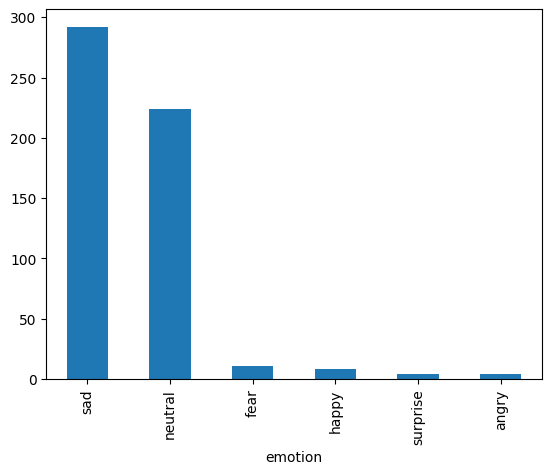

In [37]:
df['emotion'].value_counts().plot(kind='bar')

In [38]:
df['emotion_num'] = df['emotion'].map(emotion_mapping)

### Momentos de ingestion de alimentos
Comer: 66, 105, 136, 158, 202, 344, 376, 399,420, 443,

Tragar: 74, 110, 144, 164, 207, 350, 382, 406, 428, 449,

In [39]:
df2 = df.copy()
df2.reset_index(inplace=True)

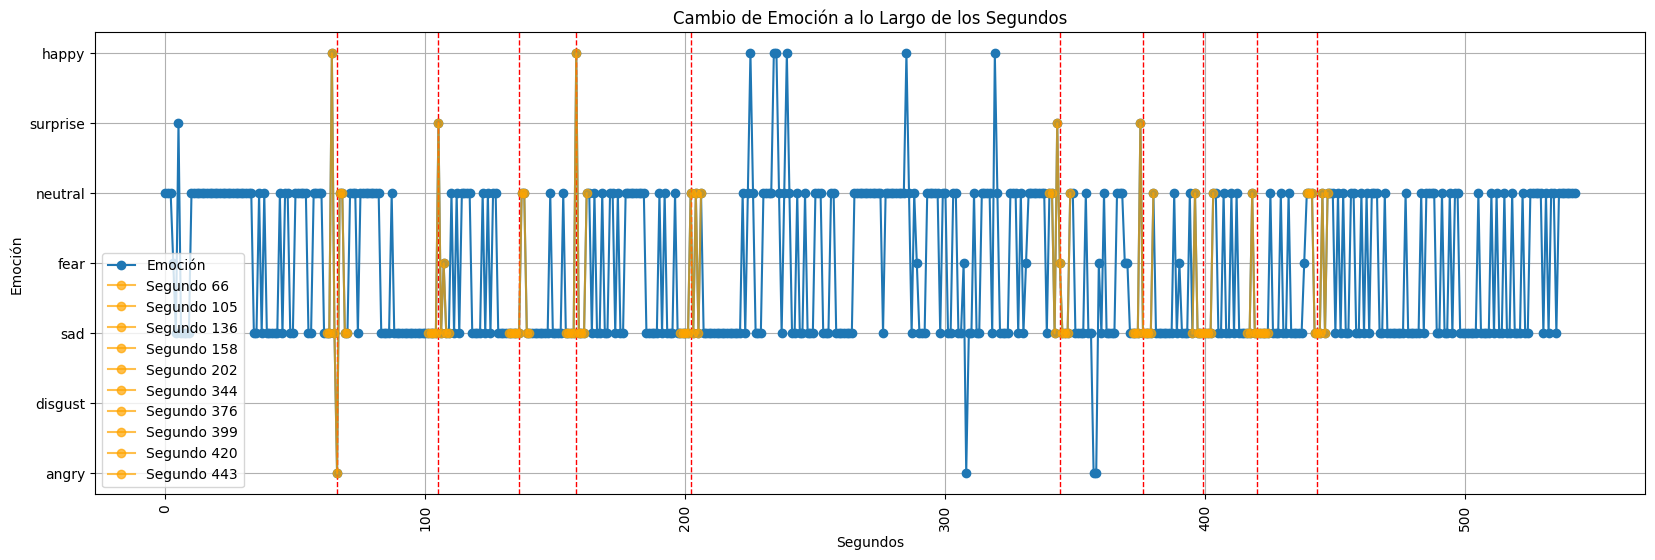

Moda: sad


In [40]:
# Crear la gráfica
plt.figure(figsize=(20, 6))

# Obtener los datos
segundos = df2['index']
emocion_num = df2['emotion_num']

# Tramar la línea principal
plt.plot(segundos, emocion_num, marker='o', linestyle='-', label='Emoción')

# Identificar los segundos específicos de interés
segundos_especificos = [66, 105, 136, 158, 202, 344, 376, 399,420, 443]  # Ejemplo, reemplaza con tus valores específicos

# Pintar de manera diferente la línea 350 milisegundos antes y después de cada segundo específico
for segundo in segundos_especificos:
    indice_segundo = segundos.index[segundo]
    plt.axvline(segundo, color='red', linestyle='--', linewidth=1)  # Obtener el índice del segundo específico
    
    # Definir los rangos de índices para 350 milisegundos antes y después
    inicio = max(0, indice_segundo - 4)  # Aprox. 350 ms antes (7 datos atrasados)
    fin = min(len(segundos) - 1, indice_segundo + 4)  # Aprox. 350 ms después (7 datos adelantados)
    
    color_segmento = 'orange'  # Cambia el color aquí si lo deseas

    # Tramar la línea con color diferente para los segmentos específicos
    plt.plot(segundos[inicio:fin+1], emocion_num[inicio:fin+1], marker='o', linestyle='-', label=f'Segundo {segundo}', alpha=0.7, color=color_segmento)

# Ajustar los ticks y etiquetas del gráfico
plt.xticks(rotation=90)  # Rotar los ticks del eje x
plt.yticks(list(emotion_mapping.values()), list(emotion_mapping.keys()))
plt.xlabel('Segundos')
plt.ylabel('Emoción')
plt.title('Cambio de Emoción a lo Largo de los Segundos')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar la moda de las emociones
print('Moda:', df2['emotion'].mode()[0])

In [41]:
df2[(df2['emotion']=='happy')]# & (df2['segundo']==145)]

index  segundo  age emotion                                    region  \
64      64       64   31   happy  {'x': 621, 'y': 280, 'w': 276, 'h': 276}   
158    158      158   29   happy  {'x': 562, 'y': 279, 'w': 286, 'h': 286}   
225    225      225   37   happy  {'x': 527, 'y': 218, 'w': 347, 'h': 347}   
234    234      234   42   happy  {'x': 520, 'y': 230, 'w': 334, 'h': 334}   
235    235      235   45   happy  {'x': 520, 'y': 229, 'w': 332, 'h': 332}   
239    239      239   43   happy  {'x': 530, 'y': 223, 'w': 333, 'h': 333}   
285    285      285   39   happy  {'x': 534, 'y': 231, 'w': 319, 'h': 319}   
319    319      320   41   happy  {'x': 541, 'y': 271, 'w': 252, 'h': 252}   

     emotion_num  
64             7  
158            7  
225            7  
234            7  
235            7  
239            7  
285            7  
319            7

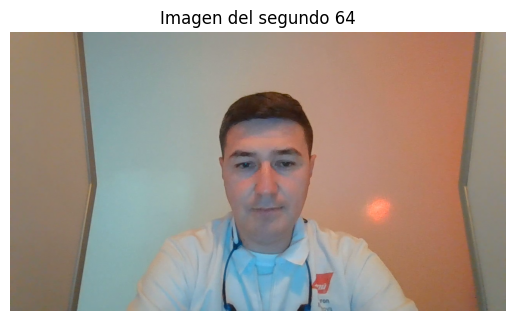

In [42]:
second = 64
video_path = "./resources/video/Chorizo ternera Dayron Montoya I.mp4"
# Llamar a la función
get_frame_from_second(video_path, second) 

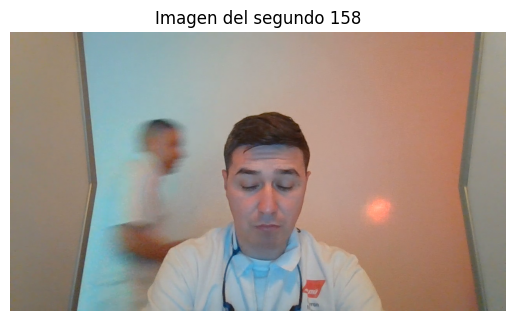

In [43]:
get_frame_from_second(video_path, second=158) 

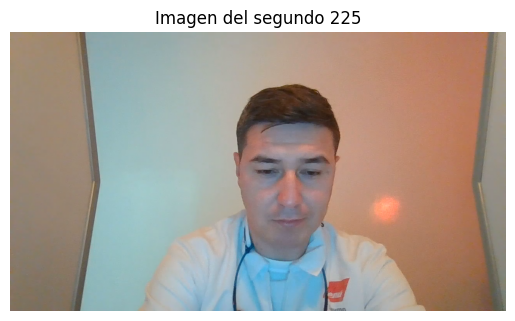

In [44]:
get_frame_from_second(video_path, second=225) 

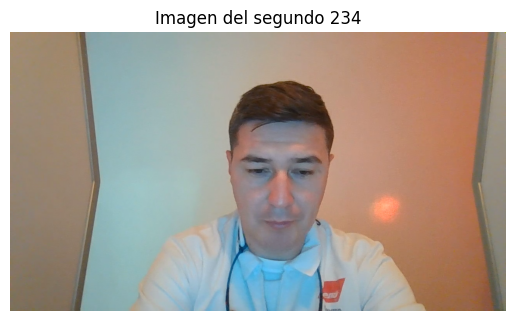

In [45]:
get_frame_from_second(video_path, second=234) 

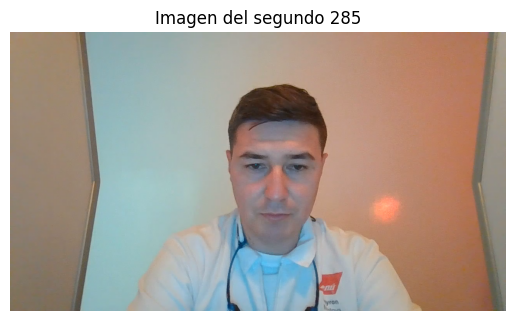

In [46]:
get_frame_from_second(video_path, second=285) 

In [47]:
df2[(df2['emotion']=='angry')]# & (df2['segundo']==145)]

index  segundo  age emotion                                    region  \
66      66       66   35   angry  {'x': 557, 'y': 240, 'w': 292, 'h': 292}   
308    308      309   24   angry  {'x': 373, 'y': 112, 'w': 104, 'h': 104}   
357    357      358   25   angry  {'x': 567, 'y': 299, 'w': 305, 'h': 305}   
358    358      359   24   angry  {'x': 566, 'y': 293, 'w': 303, 'h': 303}   

     emotion_num  
66             1  
308            1  
357            1  
358            1

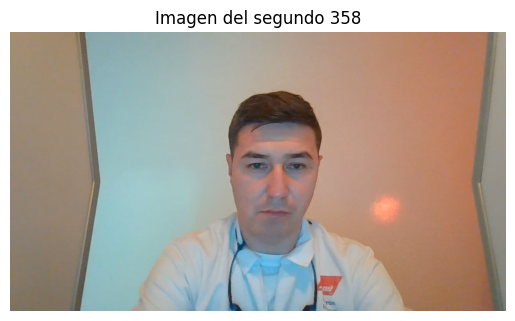

In [48]:
get_frame_from_second(video_path, second=358) 

In [49]:
df2[(df2['emotion']=='fear')]

index  segundo  age emotion                                    region  \
3        3        3   38    fear  {'x': 546, 'y': 301, 'w': 218, 'h': 218}   
107    107      107   33    fear  {'x': 543, 'y': 277, 'w': 281, 'h': 281}   
289    289      290   30    fear  {'x': 560, 'y': 279, 'w': 220, 'h': 220}   
307    307      308   28    fear  {'x': 617, 'y': 295, 'w': 198, 'h': 198}   
331    331      332   30    fear    {'x': 814, 'y': 654, 'w': 59, 'h': 59}   
344    344      345   35    fear  {'x': 587, 'y': 248, 'w': 292, 'h': 292}   
359    359      360   24    fear  {'x': 558, 'y': 293, 'w': 300, 'h': 300}   
369    369      370   24    fear  {'x': 518, 'y': 257, 'w': 274, 'h': 274}   
370    370      371   32    fear  {'x': 546, 'y': 234, 'w': 274, 'h': 274}   
390    390      393   33    fear  {'x': 522, 'y': 244, 'w': 277, 'h': 277}   
438    438      441   26    fear  {'x': 550, 'y': 255, 'w': 253, 'h': 253}   

     emotion_num  
3              4  
107            4  
289            4  
307            4  
331            4  
344            4  
359            4  
369            4  
370            4  
390            4  
438            4

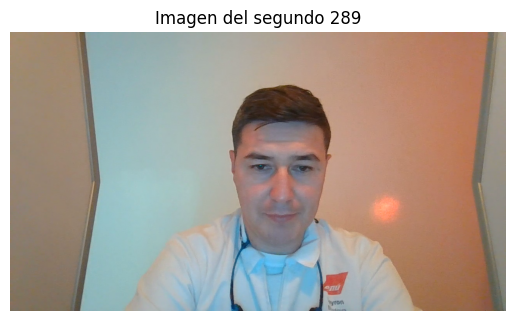

In [50]:
get_frame_from_second(video_path, second=289) 

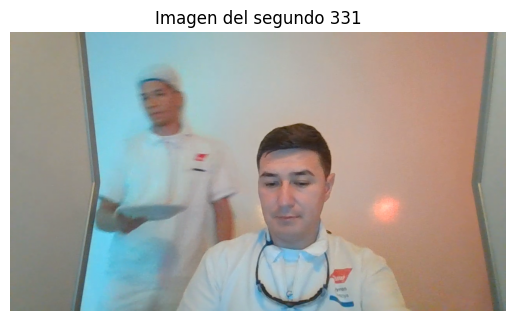

In [51]:
get_frame_from_second(video_path, second=331) 

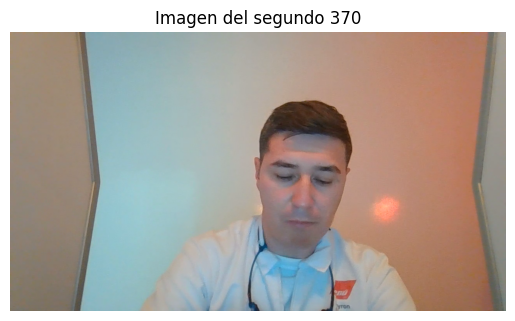

In [52]:
get_frame_from_second(video_path, second=370) 

In [53]:
df2[(df2['emotion']=='sad')].head(50)

index  segundo  age emotion                                    region  \
4        4        4   38     sad  {'x': 569, 'y': 285, 'w': 246, 'h': 246}   
6        6        6   37     sad  {'x': 524, 'y': 305, 'w': 231, 'h': 231}   
7        7        7   32     sad  {'x': 553, 'y': 300, 'w': 247, 'h': 247}   
8        8        8   43     sad  {'x': 545, 'y': 299, 'w': 251, 'h': 251}   
9        9        9   34     sad  {'x': 548, 'y': 311, 'w': 256, 'h': 256}   
34      34       34   28     sad  {'x': 538, 'y': 256, 'w': 259, 'h': 259}   
35      35       35   33     sad  {'x': 536, 'y': 256, 'w': 273, 'h': 273}   
37      37       37   34     sad  {'x': 531, 'y': 257, 'w': 282, 'h': 282}   
39      39       39   29     sad  {'x': 532, 'y': 227, 'w': 304, 'h': 304}   
40      40       40   32     sad  {'x': 513, 'y': 217, 'w': 322, 'h': 322}   
41      41       41   35     sad  {'x': 523, 'y': 226, 'w': 319, 'h': 319}   
42      42       42   40     sad  {'x': 532, 'y': 228, 'w': 316, 'h': 316}   
43      43       43   40     sad  {'x': 528, 'y': 226, 'w': 320, 'h': 320}   
45      45       45   43     sad  {'x': 530, 'y': 226, 'w': 321, 'h': 321}   
48      48       48   36     sad  {'x': 525, 'y': 245, 'w': 306, 'h': 306}   
49      49       49   38     sad  {'x': 524, 'y': 244, 'w': 308, 'h': 308}   
55      55       55   28     sad  {'x': 564, 'y': 274, 'w': 289, 'h': 289}   
56      56       56   35     sad  {'x': 571, 'y': 240, 'w': 318, 'h': 318}   
61      61       61   29     sad  {'x': 498, 'y': 260, 'w': 291, 'h': 291}   
62      62       62   28     sad  {'x': 573, 'y': 274, 'w': 292, 'h': 292}   
63      63       63   28     sad  {'x': 607, 'y': 277, 'w': 281, 'h': 281}   
65      65       65   29     sad  {'x': 612, 'y': 274, 'w': 283, 'h': 283}   
69      69       69   29     sad  {'x': 516, 'y': 230, 'w': 279, 'h': 279}   
70      70       70   28     sad  {'x': 473, 'y': 196, 'w': 290, 'h': 290}   
74      74       74   32     sad  {'x': 525, 'y': 227, 'w': 315, 'h': 315}   
83      83       83   31     sad  {'x': 518, 'y': 239, 'w': 298, 'h': 298}   
84      84       84   42     sad  {'x': 519, 'y': 253, 'w': 292, 'h': 292}   
85      85       85   29     sad  {'x': 503, 'y': 258, 'w': 296, 'h': 296}   
86      86       86   40     sad  {'x': 506, 'y': 245, 'w': 307, 'h': 307}   
88      88       88   38     sad  {'x': 528, 'y': 285, 'w': 287, 'h': 287}   
89      89       89   35     sad  {'x': 512, 'y': 267, 'w': 308, 'h': 308}   
90      90       90   32     sad  {'x': 510, 'y': 266, 'w': 307, 'h': 307}   
91      91       91   32     sad  {'x': 516, 'y': 267, 'w': 299, 'h': 299}   
92      92       92   40     sad  {'x': 510, 'y': 266, 'w': 305, 'h': 305}   
93      93       93   37     sad  {'x': 515, 'y': 267, 'w': 299, 'h': 299}   
94      94       94   31     sad  {'x': 516, 'y': 264, 'w': 300, 'h': 300}   
95      95       95   33     sad  {'x': 517, 'y': 263, 'w': 305, 'h': 305}   
96      96       96   30     sad  {'x': 555, 'y': 266, 'w': 292, 'h': 292}   
97      97       97   27     sad  {'x': 573, 'y': 280, 'w': 262, 'h': 262}   
98      98       98   36     sad  {'x': 553, 'y': 278, 'w': 263, 'h': 263}   
99      99       99   34     sad  {'x': 530, 'y': 275, 'w': 263, 'h': 263}   
100    100      100   33     sad  {'x': 528, 'y': 267, 'w': 275, 'h': 275}   
101    101      101   26     sad  {'x': 545, 'y': 276, 'w': 264, 'h': 264}   
102    102      102   33     sad  {'x': 570, 'y': 282, 'w': 278, 'h': 278}   
103    103      103   27     sad  {'x': 595, 'y': 294, 'w': 265, 'h': 265}   
104    104      104   28     sad  {'x': 587, 'y': 286, 'w': 272, 'h': 272}   
106    106      106   44     sad  {'x': 549, 'y': 276, 'w': 269, 'h': 269}   
108    108      108   38     sad  {'x': 545, 'y': 286, 'w': 281, 'h': 281}   
109    109      109   35     sad  {'x': 565, 'y': 292, 'w': 286, 'h': 286}   
111    111      111   33     sad  {'x': 582, 'y': 293, 'w': 273, 'h': 273}   

     emotion_num  
4      

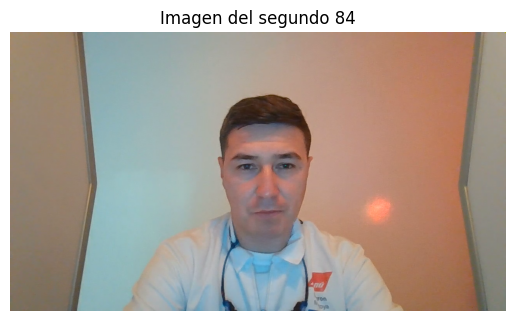

In [54]:
get_frame_from_second(video_path, second=84) 

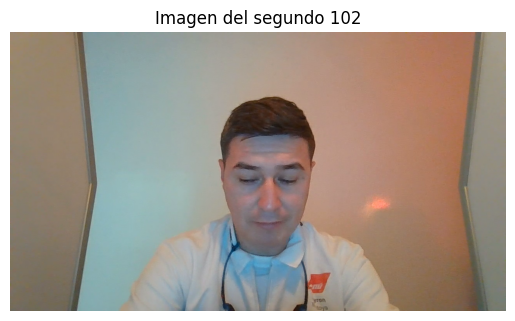

In [55]:
get_frame_from_second(video_path, second=102) 

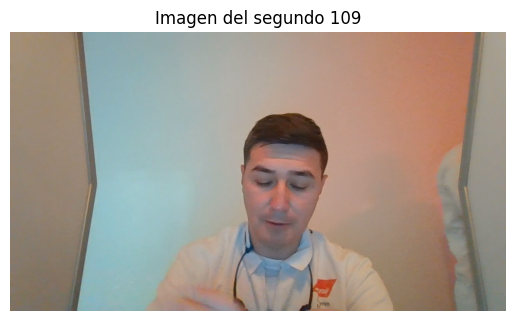

In [56]:
get_frame_from_second(video_path, second=109) 